In [1]:
def moving_average(points, window_size):
    """
    对一组点进行移动平均处理
    :param points: 输入点的列表，每个点是一个(x, y)的元组
    :param window_size: 移动平均窗口的大小
    :return: 平滑后的点的列表
    """
    smoothed_points = []
    buffer = []
    
    for point in points:
        buffer.append(point)
        
        if len(buffer) > window_size:
            buffer.pop(0)
        
        smoothed_point = (
            sum(p[0] for p in buffer) / len(buffer),
            sum(p[1] for p in buffer) / len(buffer)
        )
        
        smoothed_points.append(smoothed_point)
    
    return smoothed_points

# 示例数据，这里使用了一组随机生成的点
import random

random.seed(42)  # 设置随机种子以确保可复现性
mouse_points = [(random.randint(0, 100), random.randint(0, 100)) for _ in range(100)]

# 设置移动平均窗口的大小
window_size = 5

# 进行去噪处理
smoothed_points = moving_average(mouse_points, window_size)

# 输出平滑后的点
print("原始点：", mouse_points)
print("平滑后的点：", smoothed_points)


原始点： [(81, 14), (3, 94), (35, 31), (28, 17), (94, 13), (86, 94), (69, 11), (75, 54), (4, 3), (11, 27), (29, 64), (77, 3), (71, 25), (91, 83), (89, 69), (53, 28), (57, 75), (35, 0), (97, 20), (89, 54), (43, 35), (19, 27), (97, 43), (13, 11), (48, 12), (45, 44), (77, 33), (5, 93), (58, 68), (15, 48), (10, 70), (37, 80), (79, 46), (73, 24), (90, 8), (5, 84), (29, 98), (37, 10), (29, 12), (48, 35), (58, 81), (46, 20), (47, 45), (26, 85), (34, 89), (87, 82), (9, 77), (81, 21), (68, 93), (31, 20), (59, 48), (34, 81), (88, 71), (28, 87), (41, 98), (99, 7), (29, 4), (40, 51), (34, 8), (27, 72), (91, 40), (27, 83), (63, 50), (82, 58), (18, 33), (17, 31), (95, 71), (68, 33), (95, 74), (54, 74), (51, 46), (28, 17), (65, 63), (11, 96), (6, 14), (19, 80), (20, 87), (54, 76), (8, 49), (48, 76), (59, 67), (32, 70), (1, 87), (92, 14), (87, 68), (96, 34), (98, 82), (43, 14), (37, 55), (20, 58), (0, 92), (92, 33), (64, 97), (22, 64), (13, 80), (38, 81), (64, 77), (25, 19), (47, 97), (20, 69)]
平滑后的点： [(8

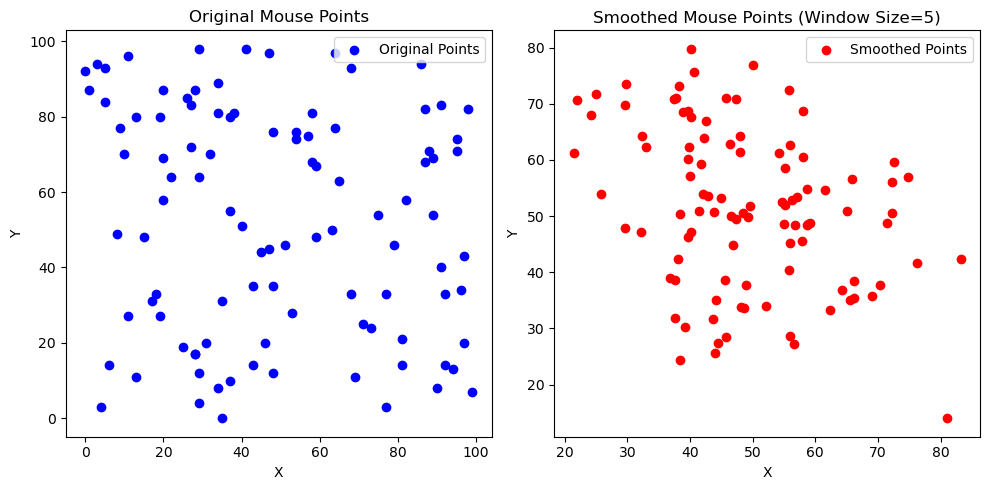

In [2]:
import random
import matplotlib.pyplot as plt

#def moving_average(points, window_size):
    # 移动平均处理函数，与之前的代码一样

# 示例数据，这里使用了一组随机生成的点
random.seed(42)
mouse_points = [(random.randint(0, 100), random.randint(0, 100)) for _ in range(100)]

# 设置移动平均窗口的大小
window_size = 5

# 进行去噪处理
smoothed_points = moving_average(mouse_points, window_size)

# 可视化原始点和平滑后的点
x_original, y_original = zip(*mouse_points)
x_smoothed, y_smoothed = zip(*smoothed_points)

plt.figure(figsize=(10, 5))

# 绘制原始点
plt.subplot(1, 2, 1)
plt.scatter(x_original, y_original, c='b', label='Original Points')
plt.title('Original Mouse Points')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()

# 绘制平滑后的点
plt.subplot(1, 2, 2)
plt.scatter(x_smoothed, y_smoothed, c='r', label='Smoothed Points')
plt.title(f'Smoothed Mouse Points (Window Size={window_size})')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()

plt.tight_layout()
plt.show()


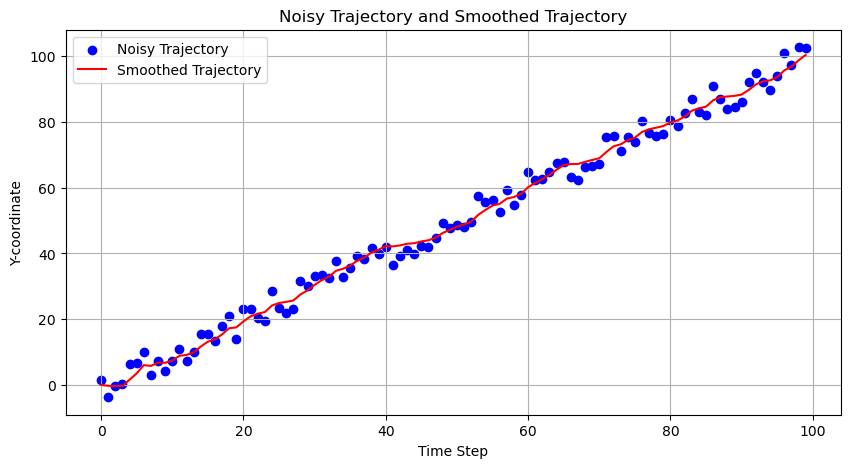

In [3]:
import random
import numpy as np
import matplotlib.pyplot as plt
from filterpy.kalman import KalmanFilter

def generate_noisy_trajectory(num_points, noise_level):
    random.seed(42)
    trajectory = [(i, i + random.uniform(-noise_level, noise_level)) for i in range(num_points)]
    return trajectory

def apply_kalman_filter(trajectory, measurement_noise, process_noise):
    # 初始化Kalman滤波器
    kf = KalmanFilter(dim_x=2, dim_z=1)
    
    # 设置状态转移矩阵F，这里假设每一步状态都是从上一步演化而来
    kf.F = np.array([[1., 1.],
                     [0., 1.]])
    
    # 设置测量矩阵H，这里是一个1x2的矩阵，表示从状态空间到测量空间的映射
    kf.H = np.array([[1., 0.]])
    
    # 设置测量噪声矩阵R，这里假设测量噪声是高斯分布
    kf.R = measurement_noise**2
    
    # 设置过程噪声矩阵Q，这里假设过程噪声也是高斯分布
    kf.Q = np.array([[process_noise**2, 0.],
                     [0., process_noise**2]])
    
    # 初始化状态向量x和协方差矩阵P
    kf.x = np.array([trajectory[0][0], 0.])  # 初始位置和速度都设为0
    kf.P = np.eye(2)  # 初始协方差矩阵设为单位矩阵
    
    # 用Kalman滤波器对轨迹数据进行处理
    smoothed_trajectory = [kf.x[0]]  # 用于存储平滑后的轨迹
    for measurement in trajectory[1:]:
        kf.predict()  # 预测下一时刻状态
        kf.update(measurement[1])  # 更新状态，这里只有Y坐标是测量值，X坐标由状态转移矩阵预测得到
        smoothed_trajectory.append(kf.x[0])
    
    return smoothed_trajectory

# 生成一组带噪声的轨迹数据
num_points = 100
noise_level = 5
trajectory_with_noise = generate_noisy_trajectory(num_points, noise_level)

# 设置Kalman滤波器的测量噪声和过程噪声
measurement_noise = noise_level
process_noise = 0.1

# 使用Kalman滤波器对轨迹数据进行降噪处理
smoothed_trajectory = apply_kalman_filter(trajectory_with_noise, measurement_noise, process_noise)

# 可视化原始轨迹和平滑后的轨迹
x_original, y_original = zip(*trajectory_with_noise)
x_smoothed, y_smoothed = range(len(smoothed_trajectory)), smoothed_trajectory

plt.figure(figsize=(10, 5))
plt.scatter(range(num_points), y_original, c='b', label='Noisy Trajectory')
plt.plot(x_smoothed, y_smoothed, c='r', label='Smoothed Trajectory')
plt.title('Noisy Trajectory and Smoothed Trajectory')
plt.xlabel('Time Step')
plt.ylabel('Y-coordinate')
plt.legend()
plt.grid()
plt.show()


In [6]:
import random
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from filterpy.kalman import KalmanFilter

def generate_noisy_trajectory_3d(num_points, noise_level):
    random.seed(42)
    trajectory = [(i, i + random.uniform(-noise_level, noise_level), i + random.uniform(-noise_level, noise_level)) for i in range(num_points)]
    return trajectory

def apply_kalman_filter_3d(trajectory, measurement_noise, process_noise):
    kf = KalmanFilter(dim_x=6, dim_z=3)  # 需要对状态向量和测量矩阵进行相应调整
    
    # 状态转移矩阵F
    kf.F = np.array([[1., 1., 0., 0., 0., 0.],
                     [0., 1., 0., 0., 0., 0.],
                     [0., 0., 1., 1., 0., 0.],
                     [0., 0., 0., 1., 0., 0.],
                     [0., 0., 0., 0., 1., 1.],
                     [0., 0., 0., 0., 0., 1.]])
    
    # 测量矩阵H
    kf.H = np.array([[1., 0., 0., 0., 0., 0.],
                     [0., 0., 1., 0., 0., 0.],
                     [0., 0., 0., 0., 1., 0.]])
    
    kf.R = measurement_noise**2
    kf.Q = np.array([[process_noise**2, 0., 0., 0., 0., 0.],
                     [0., process_noise**2, 0., 0., 0., 0.],
                     [0., 0., process_noise**2, 0., 0., 0.],
                     [0., 0., 0., process_noise**2, 0., 0.],
                     [0., 0., 0., 0., process_noise**2, 0.],
                     [0., 0., 0., 0., 0., process_noise**2]])
    
    kf.x = np.array([trajectory[0][0], 0., trajectory[0][1], 0., trajectory[0][2], 0.])  # 初始位置和速度都设为0
    kf.P = np.eye(6)  # 初始协方差矩阵设为单位矩阵
    
    smoothed_trajectory = [kf.x[0], kf.x[2], kf.x[4]]  # 用于存储平滑后的轨迹
    for measurement in trajectory[1:]:
        kf.predict()
        kf.update(np.array([measurement[0], measurement[1], measurement[2]]))
        smoothed_trajectory.extend([kf.x[0], kf.x[2], kf.x[4]])
    
    return smoothed_trajectory

# 生成一组带噪声的三维轨迹数据
num_points = 100
noise_level = 5
trajectory_with_noise_3d = generate_noisy_trajectory_3d(num_points, noise_level)

# 设置Kalman滤波器的测量噪声和过程噪声
measurement_noise = noise_level
process_noise = 0.1

# 使用Kalman滤波器对轨迹数据进行降噪处理
smoothed_trajectory_3d = apply_kalman_filter_3d(trajectory_with_noise_3d, measurement_noise, process_noise)

print(smoothed_trajectory_3d)
# 可视化原始轨迹和平滑后的轨迹
x_original, y_original, z_original = zip(*trajectory_with_noise_3d)
x_smoothed, y_smoothed, z_smoothed = smoothed_trajectory_3d

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_original, y_original, z_original, c='b', label='Noisy Trajectory')
ax.plot(x_smoothed, y_smoothed, z_smoothed, c='r', label='Smoothed Trajectory')
ax.set_title('Noisy Trajectory and Smoothed Trajectory')
ax.set_xlabel('X-coordinate')
ax.set_ylabel('Y-coordinate')
ax.set_zlabel('Z-coordinate')
ax.legend()
plt.show()


[0.0, 1.3942679845788373, -4.74989244777333, 0.5656327008265446, -1.6840741154822658, -2.2022599176852258, -2.2070742802194685, 0.15763786142065772, -0.4400794059903561, -0.26255329153007345, 3.6592423855183807, -4.393164965235912, 2.0533350424293975, 1.272553239282101, -2.6486927631898998, 2.048675072593759, -0.7649451793702071, 2.102227953627381, 4.466392089834695, -0.26824821332666915, 1.4547685967011785, 2.6460384489038153, 4.144882826699047, 3.0954532549359817, 5.135359362287669, 2.339765582694637, 6.028016201046758, 6.327179589209763, 9.421484155988027, 1.392167185990373, 5.5911146749891705, 8.649307193317249, 7.572508624871439, 9.970953448580204, 8.373458613760121, 6.525748446698017, 8.700944106588755, 13.273074828656565, 7.066889557715024, 13.255533827463816, 9.182992261265294, 9.222697595798454, 10.465968312553798, 13.940911976028396, 11.503228626222707, 11.599836905445352, 14.671119638189156, 13.897154772383532, 13.06997323762892, 13.432254152175927, 17.801130877422626, 16.13

ValueError: too many values to unpack (expected 3)

In [5]:
import random
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from filterpy.kalman import KalmanFilter

def generate_noisy_trajectory_3d(num_points, noise_level):
    random.seed(42)
    trajectory = [(i, i + random.uniform(-noise_level, noise_level), i + random.uniform(-noise_level, noise_level)) for i in range(num_points)]
    return trajectory

def apply_kalman_filter_3d(trajectory, measurement_noise, process_noise):
    kf = KalmanFilter(dim_x=6, dim_z=3)
    # ... (Rest of the code remains the same)

    smoothed_trajectory = [kf.x[0:3]]  # Corrected here, storing (X, Y, Z) as a single point in the list
    for measurement in trajectory[1:]:
        kf.predict()
        kf.update(np.array([measurement[0], measurement[1], measurement[2]]))
        smoothed_trajectory.append(kf.x[0:3])  # Corrected here, appending (X, Y, Z) as a single point

    return smoothed_trajectory

# ... (Rest of the code remains the same)

# 可视化原始轨迹和平滑后的轨迹
x_original, y_original, z_original = zip(*trajectory_with_noise_3d)
x_smoothed, y_smoothed, z_smoothed = zip(*smoothed_trajectory_3d)  # Corrected here, unpacking the points

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_original, y_original, z_original, c='b', label='Noisy Trajectory')
ax.plot(x_smoothed, y_smoothed, z_smoothed, c='r', label='Smoothed Trajectory')
ax.set_title('Noisy Trajectory and Smoothed Trajectory')
ax.set_xlabel('X-coordinate')
ax.set_ylabel('Y-coordinate')
ax.set_zlabel('Z-coordinate')
ax.legend()
plt.show()


TypeError: 'numpy.float64' object is not iterable